In [164]:
import numpy as np
import pandas as pd
import scipy as sc
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

Загрузите данные и внимательно изучите их. Сколько разных значений принимает признак religion?

In [111]:
data = pd.read_csv('botswana.tsv', sep='\t')

In [112]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [113]:
print(data.religion.value_counts())

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64


Во многих признаках есть пропущенные значения. Сколько объектов из 4361 останется, если выбросить все, содержащие пропуски?

In [114]:
data.dropna().shape[0]

1834

1. Создайте признак nevermarr, равный единице там, где в agefm пропуски.
2. Удалите признак evermarr — в сумме с nevermarr он даёт константу, значит, в нашей матрице X будет мультиколлинеарность.
3. Замените NaN в признаке agefm на cagefm=0.
4. У объектов, где nevermarr = 1, замените NaN в признаке heduc на cheduc1=−1 (ноль использовать нельзя, так как он уже встречается у некоторых объектов выборки).

Сколько осталось пропущенных значений в признаке heduc?

In [115]:
data['nevermarr'] = data.agefm.apply(lambda x: 1 if pd.isnull(x) else 0)
data.drop('evermarr', axis=1, inplace=True)

In [116]:
cagefm = 0
data.agefm.fillna(cagefm, inplace=True)

In [140]:
indeces = a.index[a.nevermarr == 1].tolist()
data.heduc.iloc[indeces] = data.heduc.iloc[indeces].apply(lambda x: -1 if pd.isnull(x) else x)

C:\Users\d.v.kulemin.UTMN\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [141]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [146]:
print(data.heduc.isnull().value_counts()[1])

123


Избавимся от оставшихся пропусков.

Для признаков idlnchld, heduc и usemeth проведите операцию, аналогичную предыдущей: создайте индикаторы пропусков по этим признакам (idlnchld_noans, heduc_noans, usemeth_noans), замените пропуски на нехарактерные значения ( cidlnchld=−1, cheduc2=−2 (значение -1 мы уже использовали), cusemeth=−1).

Остались только пропуски в признаках knowmeth, electric, radio, tv и bicycle. Их очень мало, так что удалите объекты, на которых их значения пропущены.

Какого размера теперь наша матрица данных? Умножьте количество строк на количество всех столбцов (включая отклик ceb).

In [148]:
data['idlnchld_noans'] = data.idlnchld.apply(lambda x: 1 if pd.isnull(x) else 0)
data['heduc_noans'] = data.heduc.apply(lambda x: 1 if pd.isnull(x) else 0)
data['usemeth_noans'] = data.usemeth.apply(lambda x: 1 if pd.isnull(x) else 0)

In [151]:
cidlnchld = -1
cheduc2 = -2
cusemeth = -1
data.idlnchld.fillna(cidlnchld, inplace=True)
data.heduc.fillna(cheduc2, inplace=True)
data.usemeth.fillna(cusemeth, inplace=True)

In [153]:
data.dropna(inplace=True)

In [155]:
data.shape[0] * data.shape[1]

78264

Постройте регрессию количества детей ceb на все имеющиеся признаки методом smf.ols, как в разобранном до этого примере. Какой получился коэффициент детерминации R2?

In [156]:
import statsmodels.formula.api as smf

In [161]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
             ' radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:09:58   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

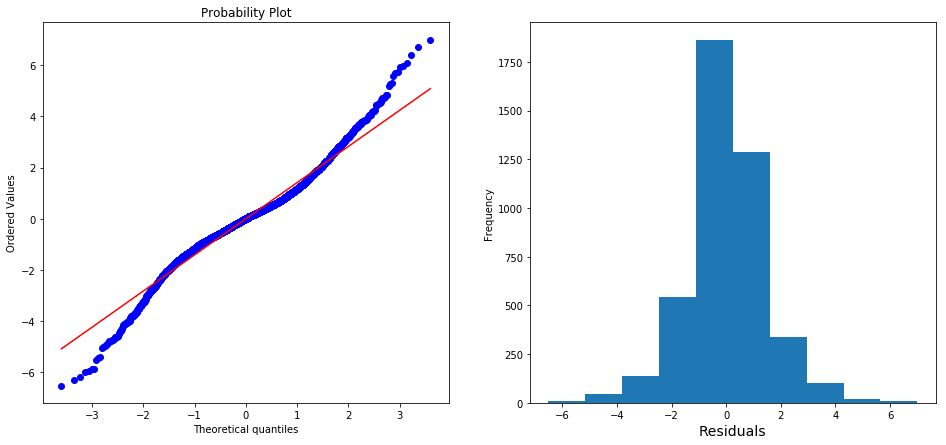

In [167]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

Проверьте критерием Бройша-Пагана гомоскедастичность ошибки в построенной модели. Выполняется ли она?

Если ошибка гетероскедастична, перенастройте модель, сделав поправку Уайта типа HC1.

In [168]:
import statsmodels.stats.api as sms

In [169]:
print('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


C:\Users\d.v.kulemin.UTMN\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


Ошибки гетероскедастичны, значит, значимость признаков может определяться неверно. Сделаем поправку Уайта:

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:20:16   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

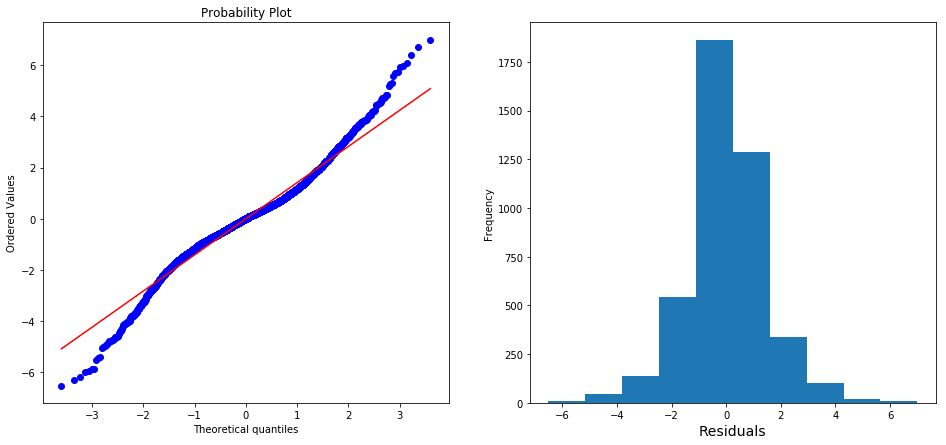

In [171]:
m2 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
             ' radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data=data)
fitted = m2.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize=(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

Удалите из модели незначимые признаки religion, radio и tv. Проверьте гомоскедастичность ошибки, при необходимости сделайте поправку Уайта.

Не произошло ли значимого ухудшения модели после удаления этой группы признаков? Проверьте с помощью критерия Фишера. Чему равен его достигаемый уровень значимости? Округлите до четырёх цифр после десятичной точки.

Если достигаемый уровень значимости получился маленький, верните все удалённые признаки; если он достаточно велик, оставьте модель без религии, тв и радио.

In [172]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
             ' bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data=data)

print('Breusch-Pagan test: p=%f' % sms.het_breushpagan(m3.fit().resid, m3.fit().model.exog)[1])

Breusch-Pagan test: p=0.000000


C:\Users\d.v.kulemin.UTMN\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


In [173]:
fitted = m3.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:24:54   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [174]:
print("F=%f, p=%f, k1=%f" % m2.fit(cov_type='HC1').compare_f_test(fitted))

F=0.919236, p=0.467231, k1=5.000000


C:\Users\d.v.kulemin.UTMN\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\regression\linear_model.py:1896: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)


Признак usemeth_noans значим по критерию Стьюдента, то есть, при его удалении модель значимо ухудшится. Но вообще-то отдельно его удалять нельзя: из-за того, что мы перекодировали пропуски в usemeth произвольно выбранным значением cusemeth=−1, удалять usemeth_noans и usemeth можно только вместе.

Удалите из текущей модели usemeth_noans и usemeth. Проверьте критерием Фишера гипотезу о том, что качество модели не ухудшилось. Введите номер первой значащей цифры в достигаемом уровне значимости (например, если вы получили 5.5×10−8, нужно ввести 8).

Если достигаемый уровень значимости получился маленький, верните удалённые признаки; если он достаточно велик, оставьте модель без usemeth и usemeth_noans.

In [179]:
m4 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban + electric +'\
             ' bicycle + nevermarr + idlnchld_noans + heduc_noans', data=data)

#print("F=%f, p=%f, k1=%f" % m3.fit().compare_f_test(m4.fit()))
_, p, _ = m3.fit().compare_f_test(m4.fit())
p

3.1552009480371243e-40

In [180]:
0.6565 + cidlnchld*0.0770

0.5795

Посмотрите на доверительные интервалы для коэффициентов итоговой модели (не забудьте использовать поправку Уайта, если есть гетероскедастичность ошибки) и выберите правильные выводы.

1. У женщин, знакомых с методами контрацепции, при прочих равных в среднем на 0.6 ребёнка меньше (p=0.001, 95% доверительный интервал для разницы между средними — [-0.9, -0.2]) (НЕТ, доверительный интервал - [0.2, 0.9])
2. У женщин, не знающих, какое количество детей идеально, в среднем на 0.66 ребёнка больше (p=0.002, 95% доверительный интервал — [0.2, 1.1]) (НЕТ, среднее должно оцениваться по βidlnchld_noans и βidlnchld)
3. С увеличением возраста женщины на 1 год среднее количество детей возрастает на 0.17 (p<0.001, 95% доверительный интервал — [0.16, 0.18]) (ДА)
4. У женщин, не знающих, какое количество детей идеально, в среднем на βidlnchld_noans+cidlnchld*βidlnchld ≈0.58 детей больше (ДА)
5. Итоговая модель объясняет 63% вариации отклика (НЕТ, 64%)
6. У женщин, никогда не выходивших замуж, при прочих равных в среднем на 2.3 ребёнка меньше (p<0.001, 95% доверительный интервал для разницы между средними — [-2.6, -1.9]) (ДА)